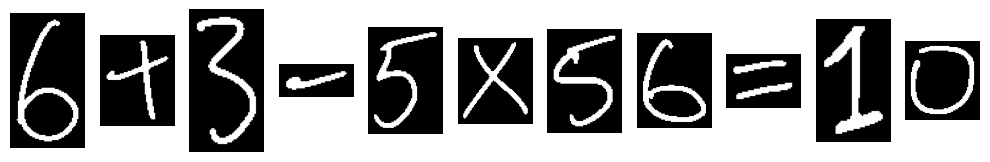

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img='equation4.png'
image = cv2.imread(img, 0)

# Apply Gaussian blurring and OTSU thresholding to binarize the image
image = cv2.GaussianBlur(image, (5, 5), 0)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours of the symbols
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a list to hold the merged contours
merged_contours = []

# Look for the external contours & ignore the child contours
merged_contours = [contour for i, contour in enumerate(contours) if hierarchy[0][i][3] == -1]

# Sort the contours
sorted_contours = sorted(merged_contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

# Function to determine if contours are close enough to be considered as an '=' sign
def contours_are_close(c1, c2):
    x1, _, w1, _ = cv2.boundingRect(c1)
    x2, _, _, _ = cv2.boundingRect(c2)
    return x2 - (x1 + w1) < 5  # contours are close if they are less than 10 pixels apart

# Iterate through contours and merge those that are close enough to form an '=' sign
merged_equals_contours = []
i = 0
while i < len(sorted_contours) - 1:
    c1 = sorted_contours[i]
    c2 = sorted_contours[i + 1]
    if contours_are_close(c1, c2):
        # Create a new contour by enclosing both c1 and c2 in a rectangle
        x, y, w, h = cv2.boundingRect(np.vstack([c1, c2]))
        merged_equals_contours.append(np.array([[[x, y]], [[x + w, y]], [[x + w, y + h]], [[x, y + h]]]))
        i += 2  
    else:
        merged_equals_contours.append(c1)
        i += 1

if i == len(sorted_contours) - 1:
    merged_equals_contours.append(sorted_contours[i])

symbols = []
for contour in merged_equals_contours:
    x, y, w, h = cv2.boundingRect(contour)
    # adding some margin around symbol
    margin = 5
    symbol = binary_image[y-margin:y+h+margin, x-margin:x+w+margin]
    symbols.append(symbol)


plt.figure(figsize=(10, 2))
for i, symbol in enumerate(symbols):
    plt.subplot(1, len(symbols), i+1)
    plt.imshow(symbol, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

